c:\Users\Tomek\miniconda3\envs\ABD\lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Tomek\miniconda3\envs\ABD\lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.4993457988388652


c:\Users\Tomek\miniconda3\envs\ABD\lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Tomek\miniconda3\envs\ABD\lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.5632979688519872


c:\Users\Tomek\miniconda3\envs\ABD\lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.5044833101629123


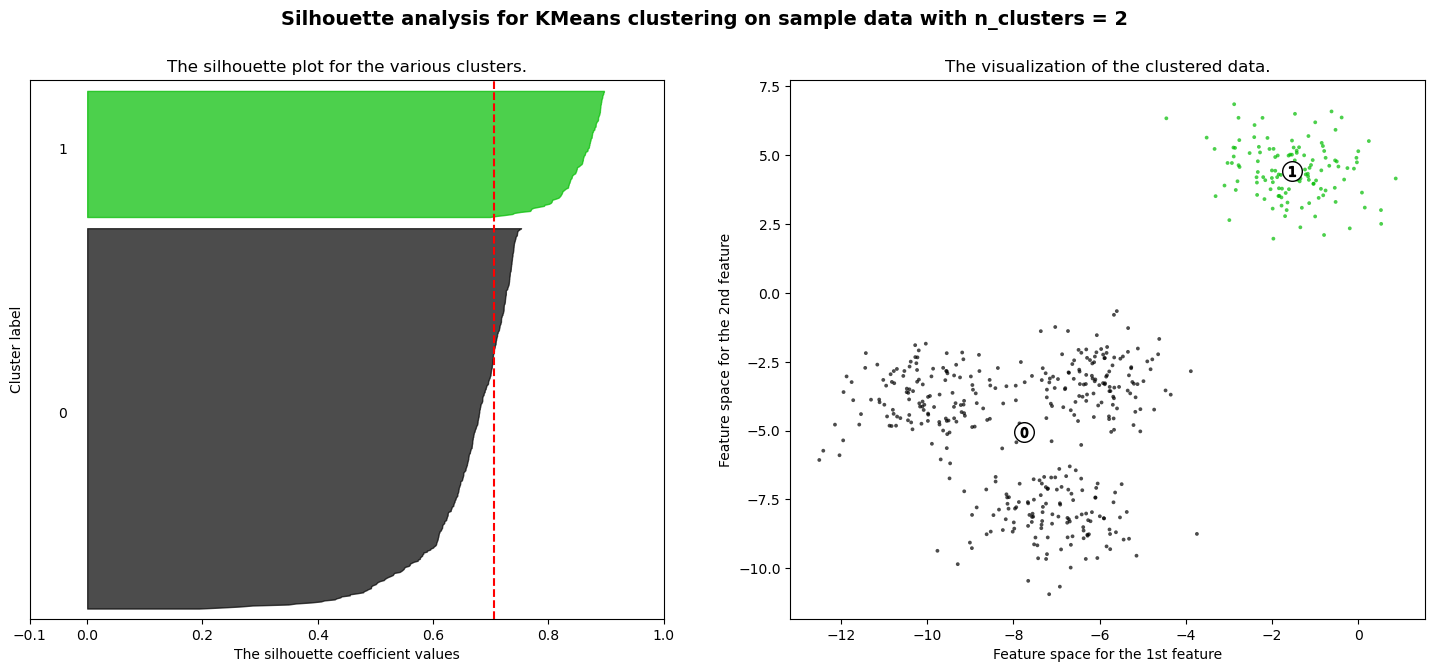

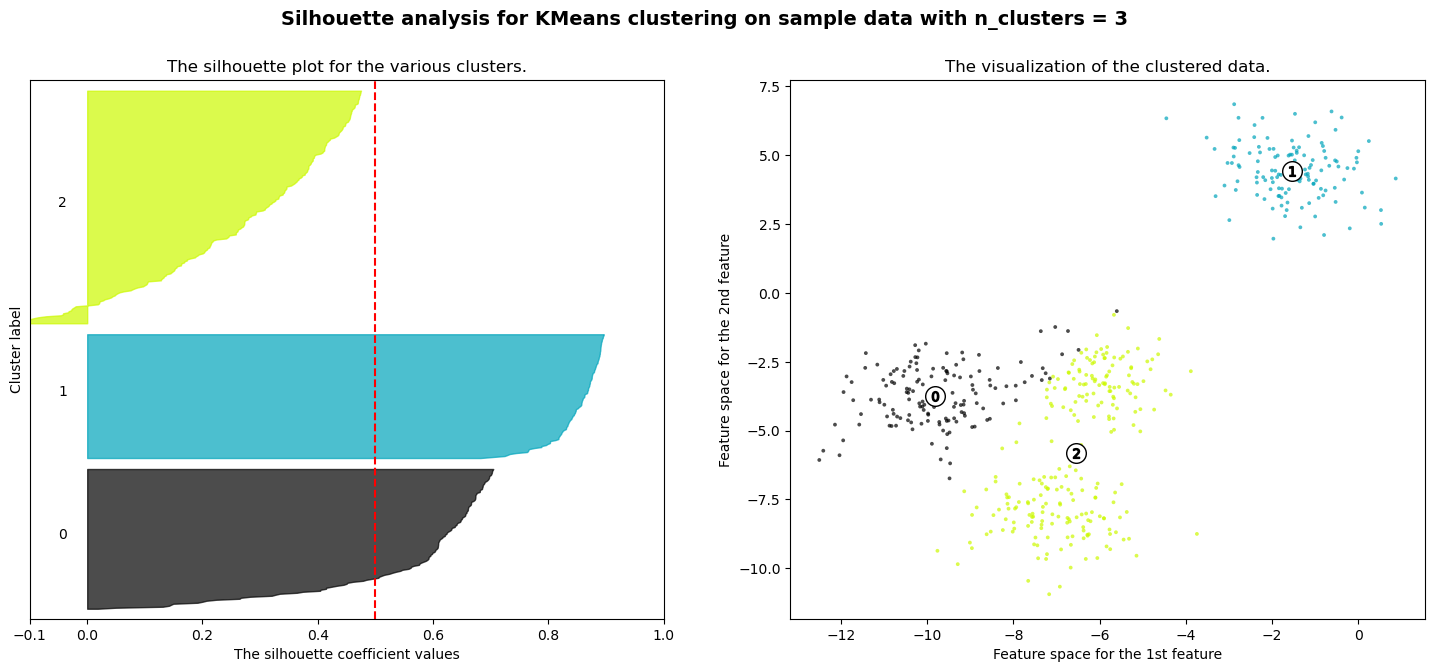

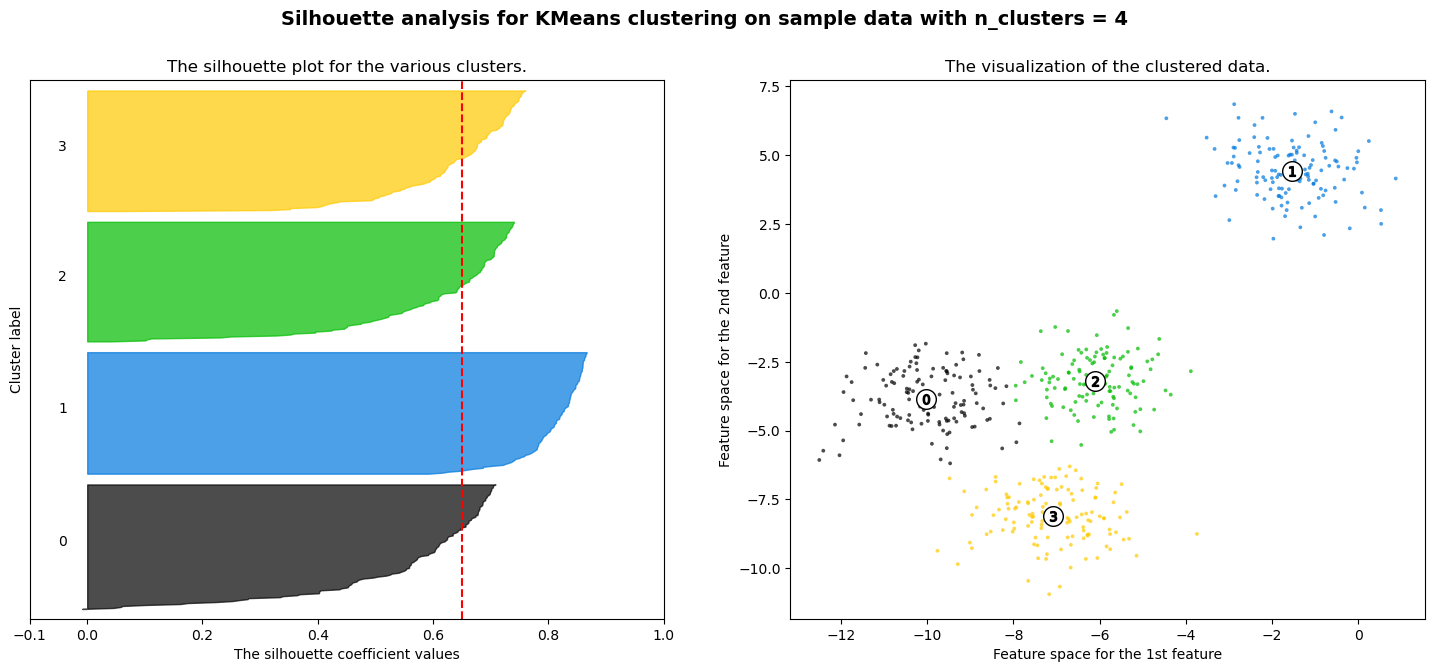

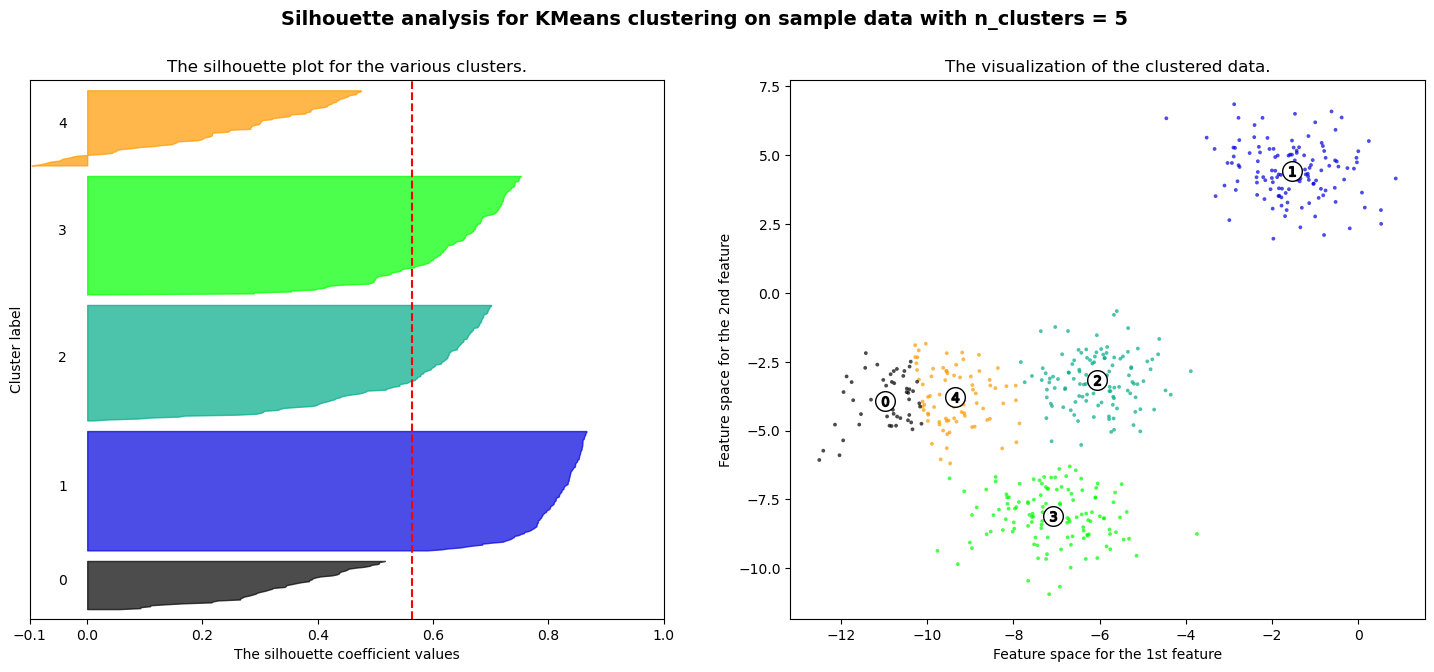

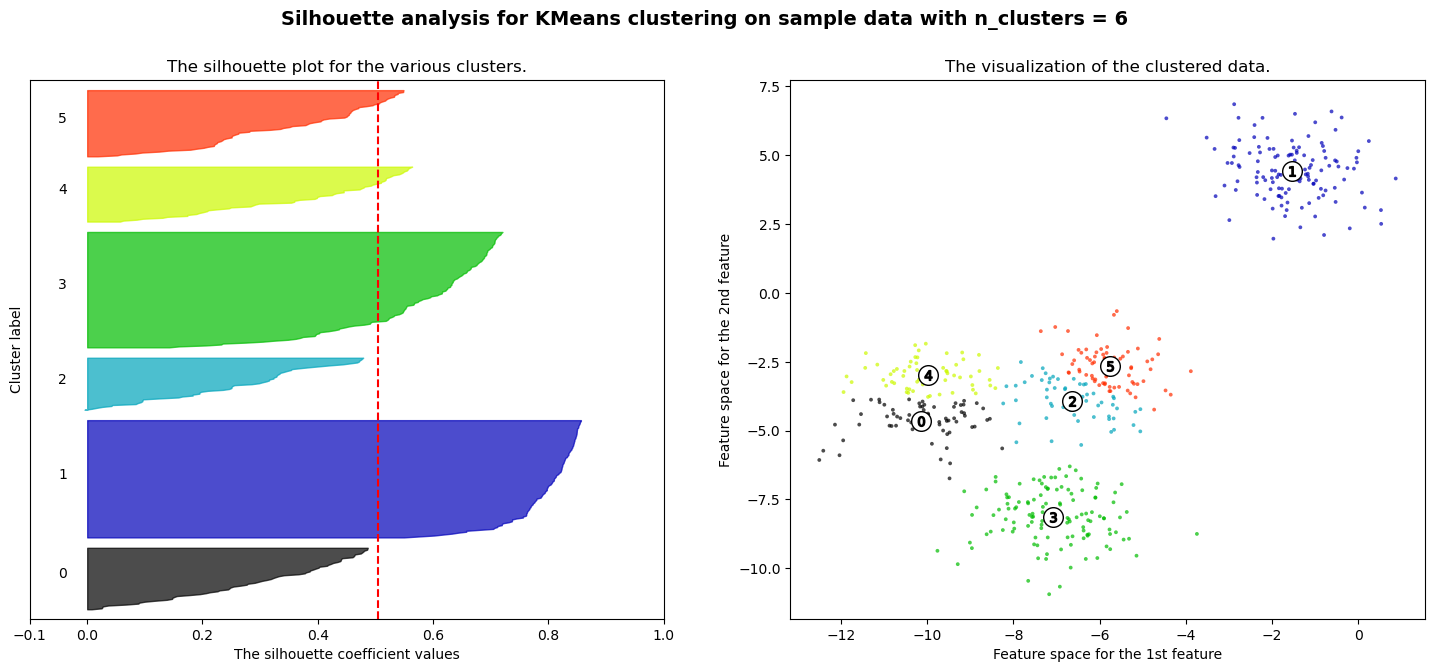

In [25]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering, DBSCAN 
import scipy.cluster.hierarchy as ch
from sklearn.datasets import make_moons

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

import pandas as pd  
import os
 
 
# Generowanie danych
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1) 
# Wybór liczby skupień celem porównania 
range_n_clusters = [2, 3, 4, 5, 6]
 
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
 
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
 
    # Proszę stworzyć model klasy KMeans z liczbą klastrówn_clusters oraz losową liczbą wstępnych centroidów random_state=10
 
    clusterer = KMeans(n_clusters=n_clusters, random_state=43)
   # Naucz model - wynik predykcji
    cluster_labels = clusterer.fit_predict(X)
 
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
 
    # Wyznacz współczynnik profilu dla każdego przypadku wykorzystując funkcję silhouette_samples
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
 
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
 
        ith_cluster_silhouette_values.sort()
 
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
 
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
 
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
 
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
 
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
 
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
 
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
 
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
 
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
 
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
 
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
 
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
 
plt.show()

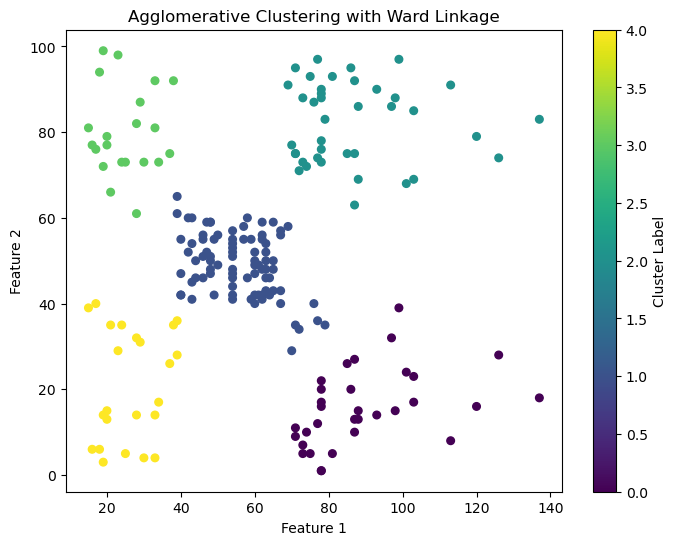

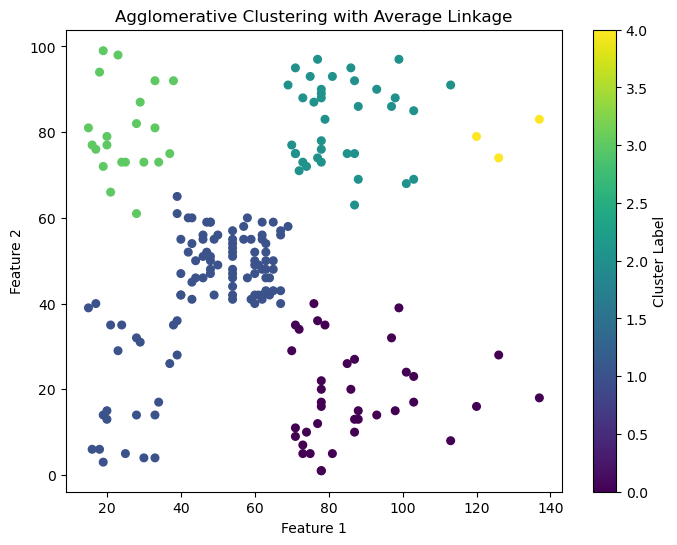

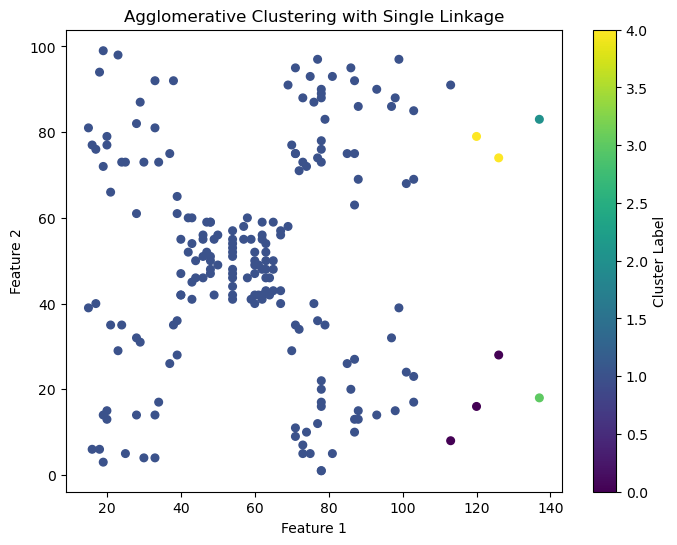

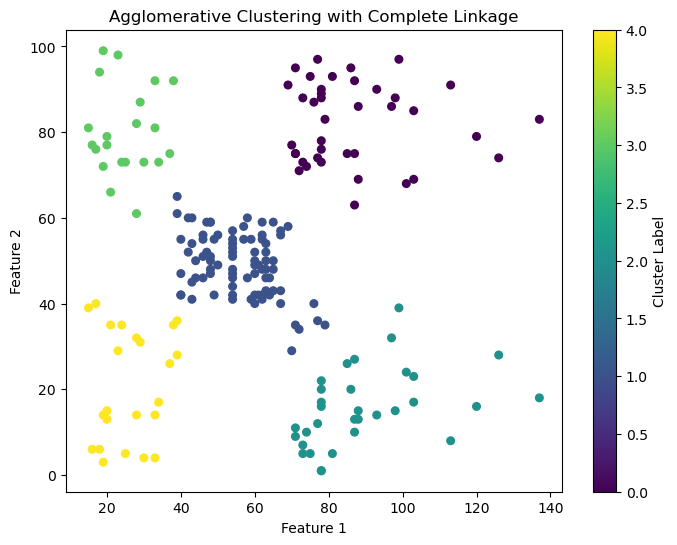

In [26]:
path = os.getcwd() + '/shopping_data.csv'
customer_data = pd.read_csv(path)  
 
data = customer_data.iloc[:, 3:5].values

average_linkage = AgglomerativeClustering(n_clusters=5, linkage='average')
ward = AgglomerativeClustering(n_clusters=5, linkage='ward')
single = AgglomerativeClustering(n_clusters=5, linkage='single')
complete_linkage = AgglomerativeClustering(n_clusters=5, linkage='complete')

ward_labels = ward.fit_predict(data)
average_linkage_labels = average_linkage.fit_predict(data)
single_labels = single.fit_predict(data)
complete_linkage_labels = complete_linkage.fit_predict(data)

# Plotting the results for Agglomerative Clustering
labels = [ward_labels, average_linkage_labels, single_labels, complete_linkage_labels]
linkage_methods = ['Ward', 'Average', 'Single', 'Complete']

for i, method in enumerate(linkage_methods):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels[i], cmap='viridis', marker='o', s=30)
    plt.title(f'Agglomerative Clustering with {method} Linkage')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(label='Cluster Label')
    plt.show()

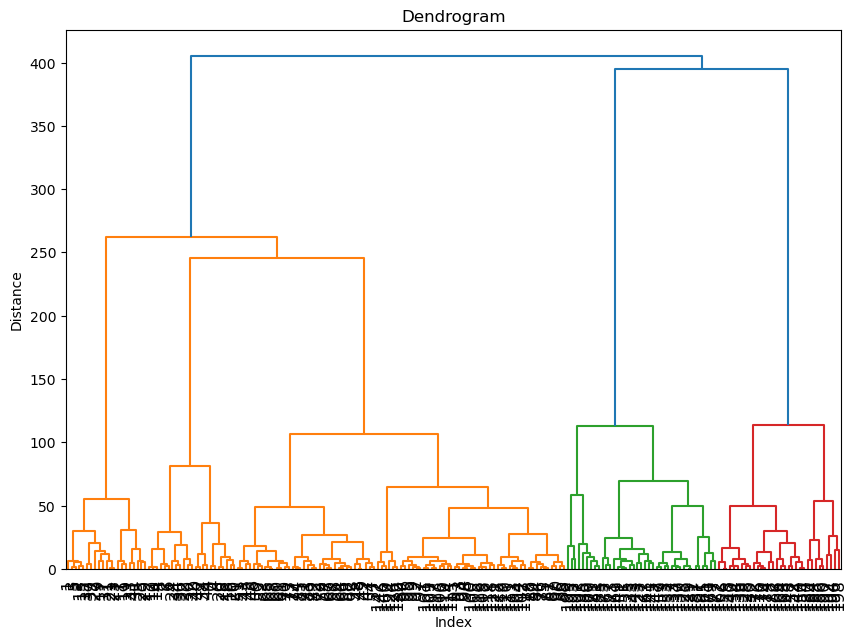

In [27]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrogram") 
# Proszę wyliczyć odległość dla metody Warda (funkcja linkage)
# Przy pomocy funkcji dendrogram wyświetl wynik
Z = ch.linkage(data, method='ward')
ch.dendrogram(Z, leaf_rotation=90., leaf_font_size=12.)
plt.xlabel("Index")
plt.ylabel("Distance")
plt.show()


## MOON


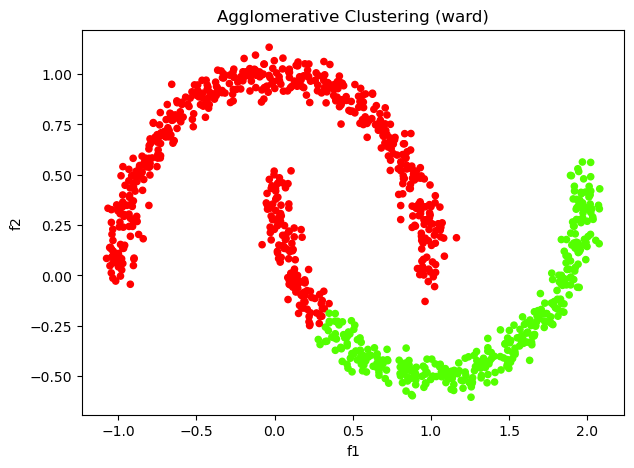

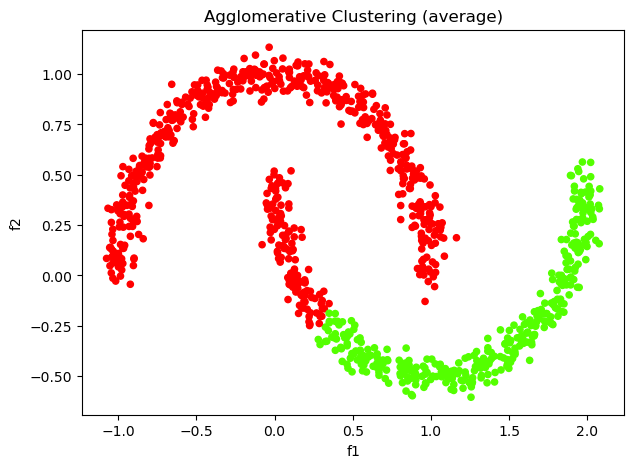

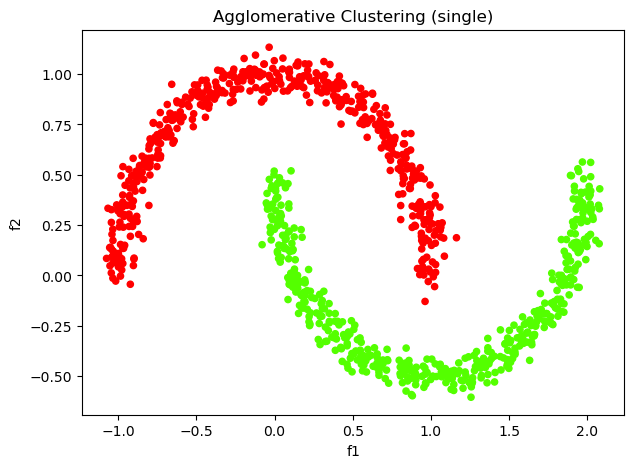

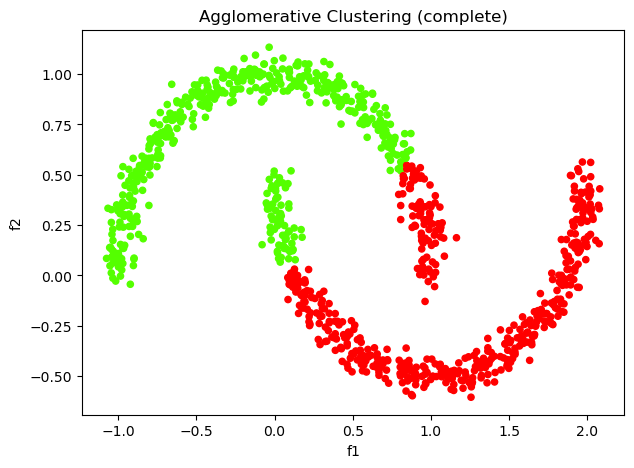

In [28]:
# Dane make_moons
x, y = make_moons(1000, noise=.05, random_state=0)
X_moon = pd.DataFrame(x, columns=['f1', 'f2'])

linkage_methods = ['ward', 'average', 'single', 'complete']

for method in linkage_methods:

    if method == 'ward':
        model = AgglomerativeClustering(n_clusters=2, linkage=method)
    else:
        model = AgglomerativeClustering(n_clusters=2, linkage=method)
    labels = model.fit_predict(X_moon)
    
    plt.figure(figsize=(7, 5))
    plt.scatter(X_moon['f1'], X_moon['f2'], c=labels, cmap='prism', s=20)
    plt.title(f'Agglomerative Clustering ({method})')
    plt.xlabel('f1')
    plt.ylabel('f2')
    plt.show()

# DBSCAN

c:\Users\Tomek\miniconda3\envs\ABD\lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


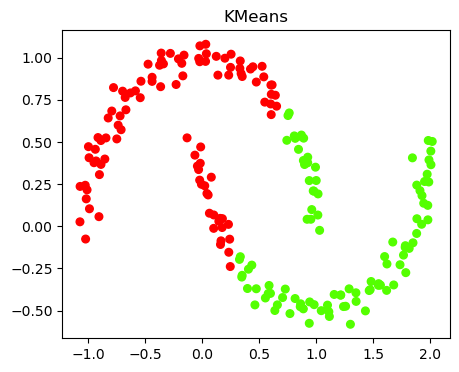

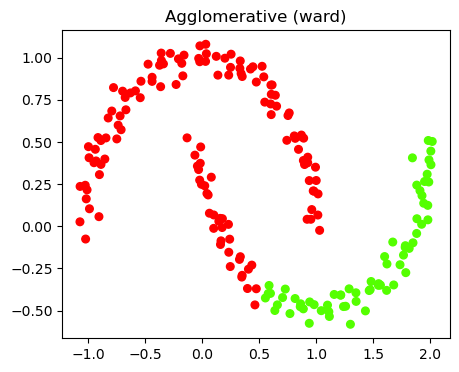

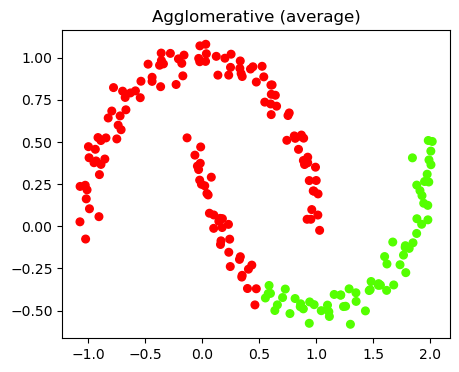

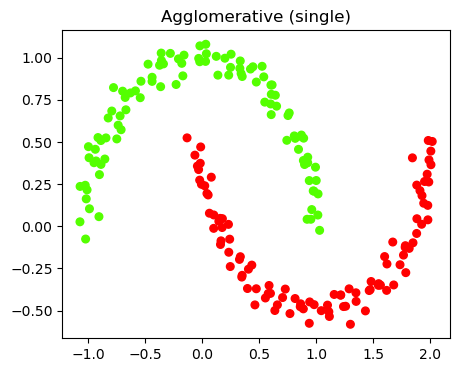

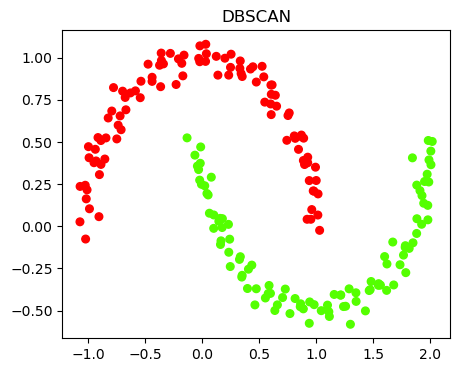

In [29]:
# Dane
x, y = make_moons(n_samples=200, noise=.05, random_state=0)
X = pd.DataFrame(x, columns=['f1', 'f2'])

# KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
labels_kmeans = kmeans.fit_predict(X)

plt.figure(figsize=(5,4))
plt.scatter(X['f1'], X['f2'], c=labels_kmeans, cmap='prism', s=30)
plt.title('KMeans')
plt.show()

# Agglomerative Clustering (Ward)
agg_ward = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels_ward = agg_ward.fit_predict(X)

plt.figure(figsize=(5,4))
plt.scatter(X['f1'], X['f2'], c=labels_ward, cmap='prism', s=30)
plt.title('Agglomerative (ward)')
plt.show()

# Agglomerative Clustering (average)
agg_avg = AgglomerativeClustering(n_clusters=2, linkage='average')
labels_avg = agg_avg.fit_predict(X)

plt.figure(figsize=(5,4))
plt.scatter(X['f1'], X['f2'], c=labels_avg, cmap='prism', s=30)
plt.title('Agglomerative (average)')
plt.show()

# Agglomerative Clustering (single)
agg_single = AgglomerativeClustering(n_clusters=2, linkage='single')
labels_single = agg_single.fit_predict(X)

plt.figure(figsize=(5,4))
plt.scatter(X['f1'], X['f2'], c=labels_single, cmap='prism', s=30)
plt.title('Agglomerative (single)')
plt.show()

# DBSCAN (parametry można dobrać eksperymentalnie)
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels_dbscan = dbscan.fit_predict(X)

plt.figure(figsize=(5,4))
plt.scatter(X['f1'], X['f2'], c=labels_dbscan, cmap='prism', s=30)
plt.title('DBSCAN')
plt.show()